In [2]:
pip install pandas numpy matplotlib seaborn statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
# Daten einlesen
import pandas as pd
df = pd.read_csv("C:/Users/dalil/OneDrive/DAlilahuni/Excel/history_37295290-1970-01-01-MAX.csv", sep=';')
df


,Datum,Eröffnung,Hoch,Tief,Schluss,Währung,Volumen
0,29.06.2010,"1,267","1,667","1,169","1,593",USD,2.817491e+08
1,30.06.2010,"1,719","2,028","1,553","1,589",USD,2.579159e+08
2,01.07.2010,"1,667","1,728","1,351","1,464",USD,1.234479e+08
3,02.07.2010,"1,533","1,540","1,247","1,280",USD,7.712711e+07
4,06.07.2010,"1,333","1,333","1,055","1,074",USD,1.031894e+08
...,...,...,...,...,...,...,...
3735,05.05.2025,"284,570","284,849","274,400","280,260",USD,9.461888e+07
3736,06.05.2025,"273,105","277,730","271,350","275,350",USD,7.671579e+07
3737,07.05.2025,"276,880","277,920","271,000","276,220",USD,7.188241e+07
3738,08.05.2025,"279,630","289,800","279,410","284,820",USD,9.753945e+07


In [17]:
print(df.columns)


Index(['Eröffnung', 'Hoch', 'Tief', 'Schluss', 'Währung', 'Volumen'], dtype='object')


In [3]:
# Datum konvertieren und als Index setzen
df['Datum'] = pd.to_datetime(df['Datum'], format="%d.%m.%Y")
df.set_index('Datum', inplace=True)

# Zahlenformat anpassen (Kommas -> Punkte)
df['Schluss'] = df['Schluss'].str.replace(',', '.').astype(float)

# Wähle den Schlusskurs für die Zeitreihenanalyse
timeseries = df['Schluss']

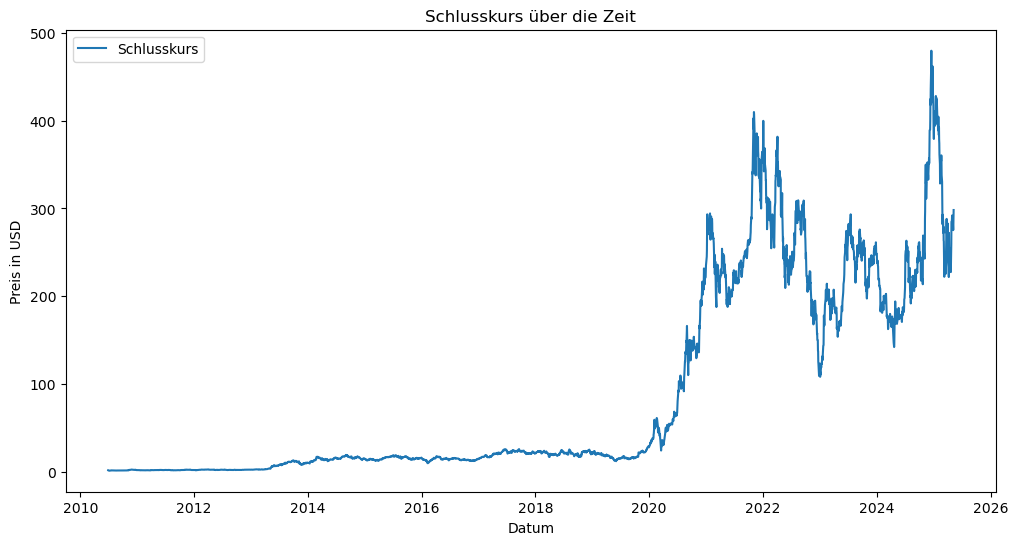

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Schluss'], label='Schlusskurs')
plt.title('Schlusskurs über die Zeit')
plt.xlabel('Datum')
plt.ylabel('Preis in USD')
plt.legend()
plt.show()


In [7]:
# 1. Stationaritätstest (Augmented Dickey-Fuller Test)
def stationarity_test(timeseries):
    # ADF Test
    print('Ergebnisse des Augmented Dickey-Fuller Tests:')
    adftest = adfuller(timeseries, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistik','p-Wert','# Lags Used','Anzahl der Beobachtungen'])
    for key, value in adftest[4].items():
        adfoutput['Kritischer Wert (%s)'%key] = value
    print(adfoutput)
    
    # KPSS Test
    print('\nErgebnisse des KPSS Tests:')
    kpsstest = kpss(timeseries)
    kpssoutput = pd.Series(kpsstest[0:2], index=['Test Statistik', 'p-Wert'])
    for key, value in kpsstest[3].items():
        kpssoutput['Kritischer Wert (%s)'%key] = value
    print(kpssoutput)

# Stationaritätstest für Schlusskurs
print("Stationaritätstest für Schlusskurs:")
stationarity_test(timeseries)

Stationaritätstest für Schlusskurs:
Ergebnisse des Augmented Dickey-Fuller Tests:
Test Statistik                -1.252494
p-Wert                         0.650617
# Lags Used                   28.000000
Anzahl der Beobachtungen    3711.000000
Kritischer Wert (1%)          -3.432113
Kritischer Wert (5%)          -2.862319
Kritischer Wert (10%)         -2.567185
dtype: float64

Ergebnisse des KPSS Tests:
Test Statistik            6.974721
p-Wert                    0.010000
Kritischer Wert (10%)     0.347000
Kritischer Wert (5%)      0.463000
Kritischer Wert (2.5%)    0.574000
Kritischer Wert (1%)      0.739000
dtype: float64


C:\Users\dalil\AppData\Local\Temp\ipykernel_23780\4228490015.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries)


In [8]:
# Wenn Stationarität gegeben, verwende Originaldaten
# eries_for_analysis = timeseries

# 2. Differenzierung zur Herstellung der Stationarität
df['Schluss_Differenz'] = df['Schluss'].diff()

print("\nStationaritätstest für erste Differenz:")
stationarity_test(df['Schluss_Differenz'].dropna())




Stationaritätstest für erste Differenz:
Ergebnisse des Augmented Dickey-Fuller Tests:
Test Statistik             -1.097397e+01
p-Wert                      7.753248e-20
# Lags Used                 2.700000e+01
Anzahl der Beobachtungen    3.711000e+03
Kritischer Wert (1%)       -3.432113e+00
Kritischer Wert (5%)       -2.862319e+00
Kritischer Wert (10%)      -2.567185e+00
dtype: float64

Ergebnisse des KPSS Tests:
Test Statistik            0.072391
p-Wert                    0.100000
Kritischer Wert (10%)     0.347000
Kritischer Wert (5%)      0.463000
Kritischer Wert (2.5%)    0.574000
Kritischer Wert (1%)      0.739000
dtype: float64


C:\Users\dalil\AppData\Local\Temp\ipykernel_23780\4228490015.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries)


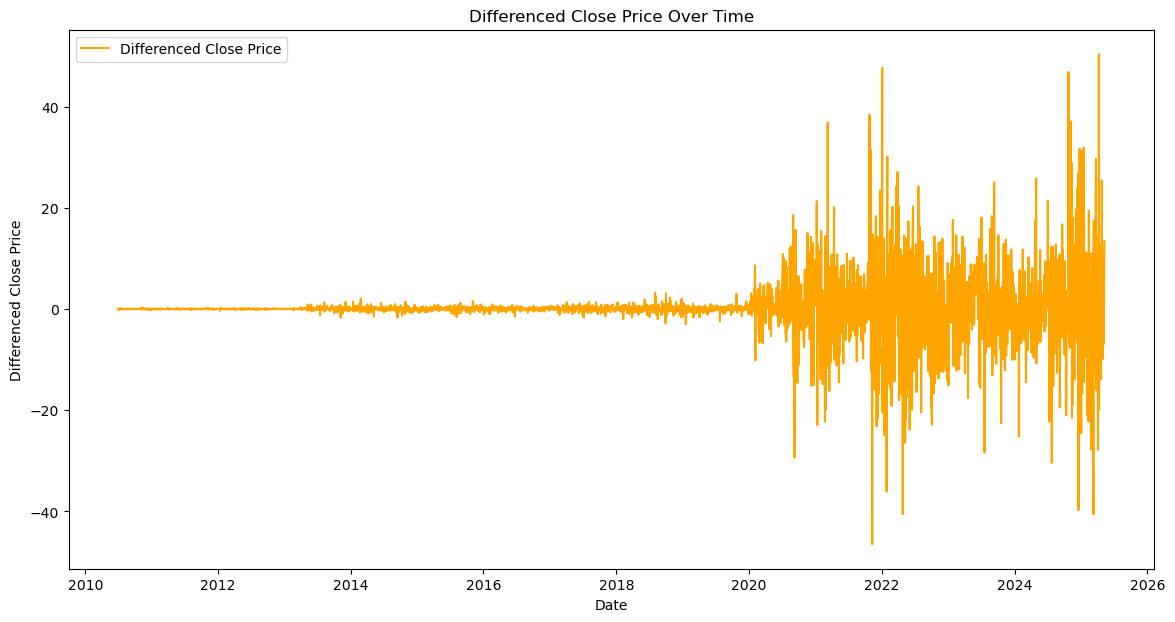

In [9]:
# Plotting the differenced Close price
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Schluss_Differenz'], label='Differenced Close Price', color='orange')
plt.title('Differenced Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.show()

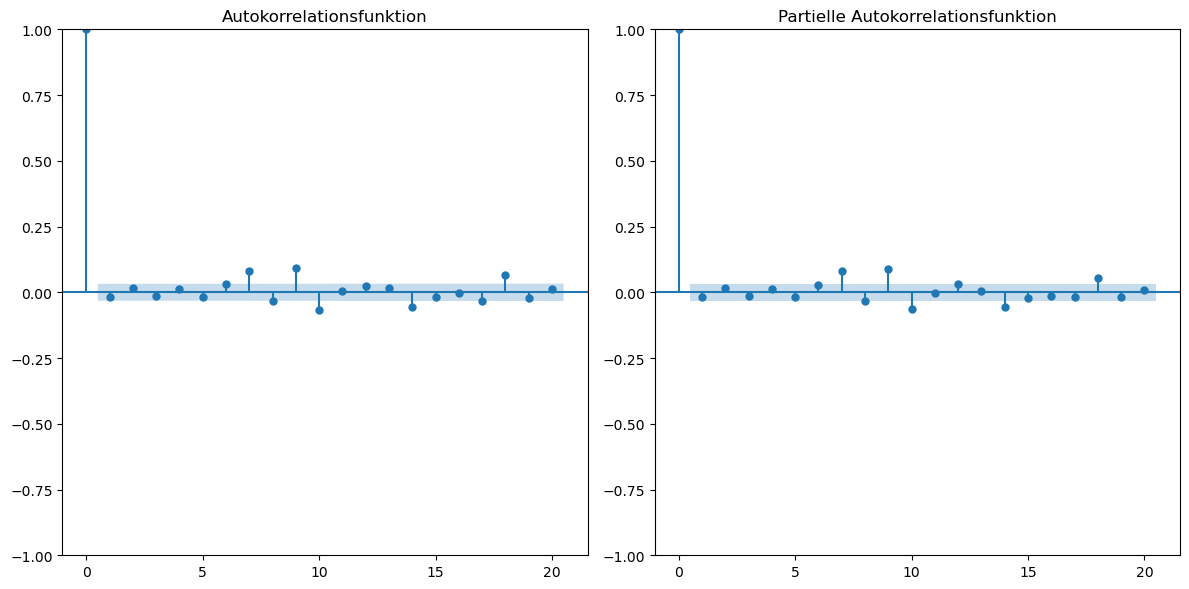

In [10]:
# 3. ACF und PACF Plots
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(df['Schluss_Differenz'].dropna(), ax=plt.gca(), lags=20)
plt.title('Autokorrelationsfunktion')
plt.subplot(122)
plot_pacf(df['Schluss_Differenz'].dropna(), ax=plt.gca(), lags=20)
plt.title('Partielle Autokorrelationsfunktion')
plt.tight_layout()
plt.show()


In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Split data into train and test
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train["Schluss"], order=(1,1,1))
model_fit = model.fit()


# model = ARIMA(series_for_analysis, order=(1, 0, 0))  # p=1, d=0 (stationär), q=0
# result = model.fit()
# print(result.summary())


c:\Users\dalil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dalil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dalil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


c:\Users\dalil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


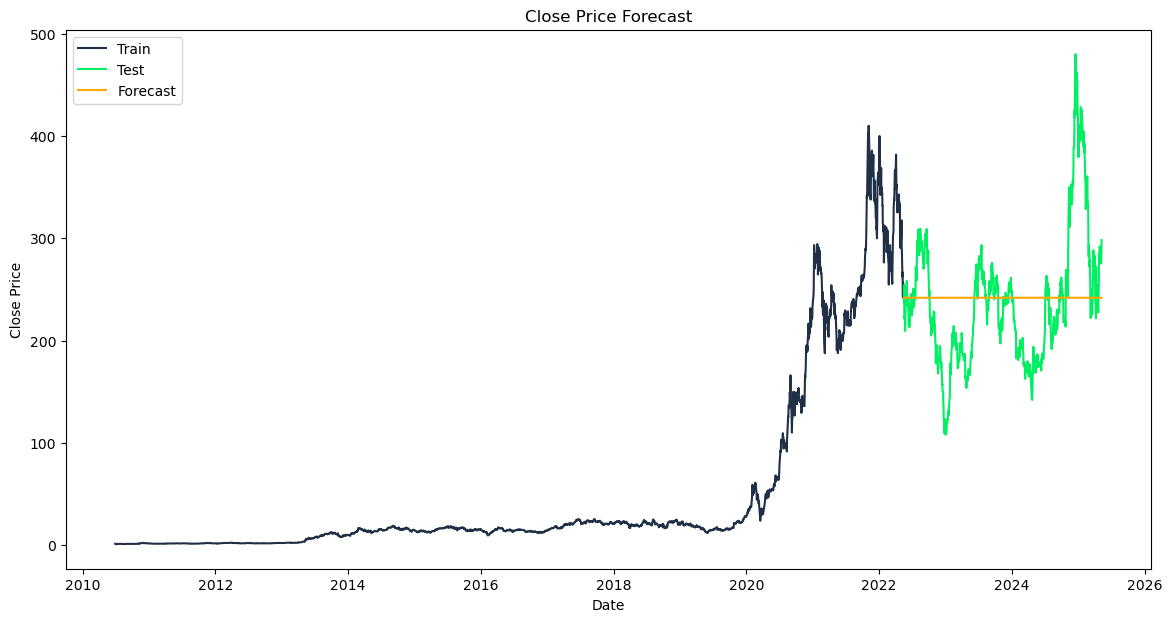

In [13]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(train.index, train["Schluss"], label='Train', color='#203147')
plt.plot(test.index, test["Schluss"], label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('Close Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


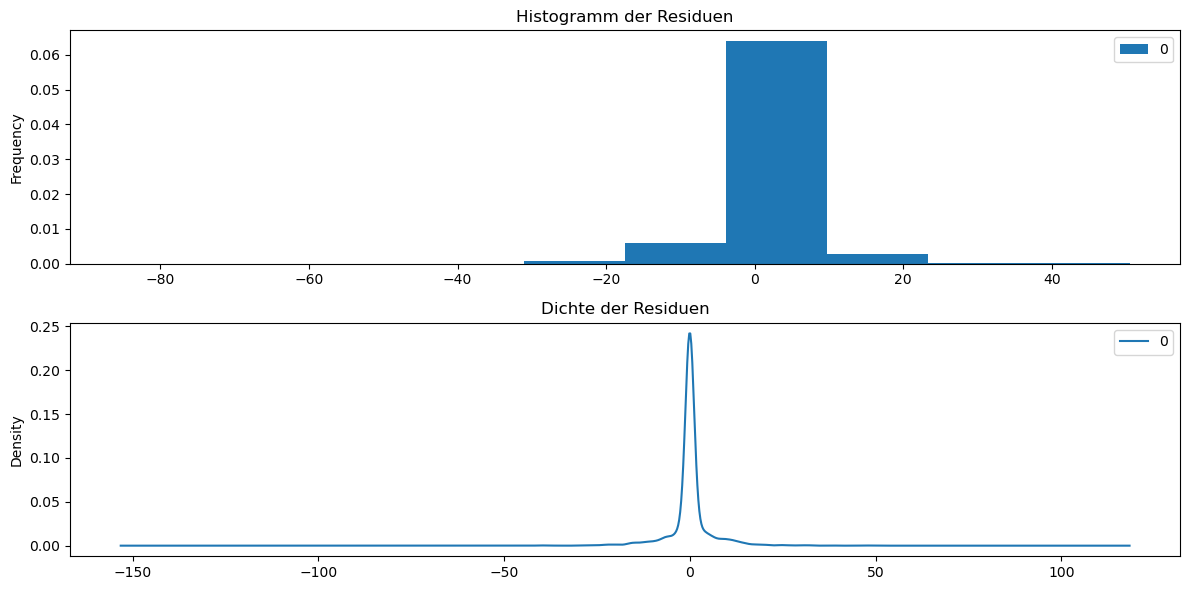

In [28]:
# 5. Residuen-Analyse
residuals = pd.DataFrame(best_model.resid)
plt.figure(figsize=(12,6))
plt.subplot(211)
residuals.plot(kind='hist', density=True, ax=plt.gca())
plt.title('Histogramm der Residuen')
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.title('Dichte der Residuen')
plt.tight_layout()
plt.show()


In [29]:
# 6. Koeffizienten-Statistiken
print("\nModell-Zusammenfassung:")
print(best_model.summary())



Modell-Zusammenfassung:
                               SARIMAX Results                                
Dep. Variable:                Schluss   No. Observations:                 3740
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -11746.272
Date:                Mon, 12 May 2025   AIC                          23498.545
Time:                        14:08:24   BIC                          23517.225
Sample:                             0   HQIC                         23505.189
                               - 3740                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.9269    205.397      0.423      0.672    -315.643     489.497
ar.L1          0.9992      0.001   1071.667      0.000       0.997       1.001
sigma2        31.2446      

c:\Users\dalil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dalil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\dalil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


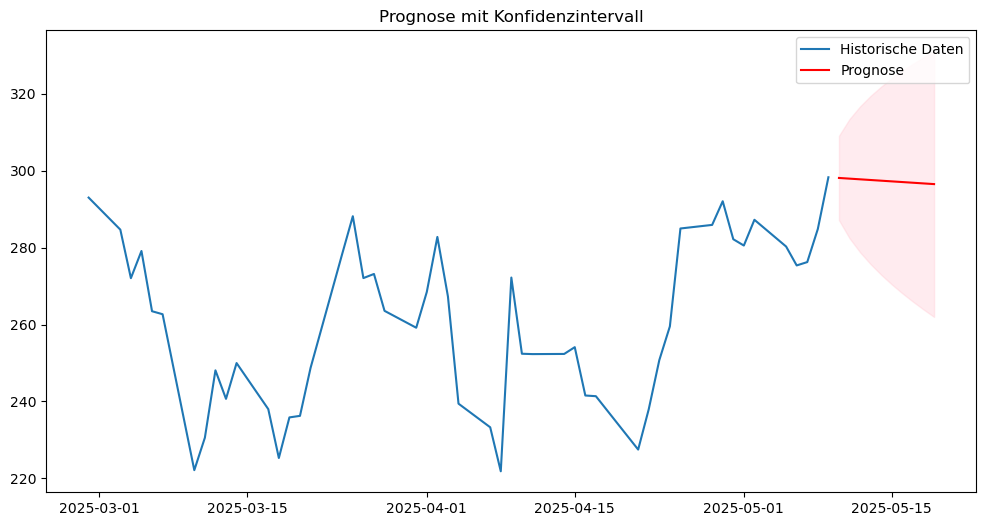


Prognose für die nächsten 10 Perioden:
3740    298.081791
3741    297.903733
3742    297.725824
3743    297.548066
3744    297.370458
3745    297.192999
3746    297.015690
3747    296.838530
3748    296.661520
3749    296.484659
Name: predicted_mean, dtype: float64

Konfidenzintervalle:
      lower Schluss  upper Schluss
3740     287.126202     309.037380
3741     282.416721     313.390744
3742     278.766180     316.685469
3743     275.664578     319.431554
3744     272.914279     321.826636
3745     270.413878     323.972120
3746     268.103110     325.928270
3747     265.942689     327.734371
3748     263.905319     329.417722
3749     261.971114     330.998205


In [30]:
# 7. Prognose für die nächsten 10 Perioden
forecast = best_model.forecast(steps=10)
forecast_ci = best_model.get_forecast(steps=10)
conf_int = forecast_ci.conf_int()

plt.figure(figsize=(12,6))
plt.plot(df.index[-50:], df['Schluss'][-50:], label='Historische Daten')
plt.plot(pd.date_range(start=df.index[-1], periods=11)[1:], forecast, label='Prognose', color='red')
plt.fill_between(pd.date_range(start=df.index[-1], periods=11)[1:], 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Prognose mit Konfidenzintervall')
plt.legend()
plt.show()

print("\nPrognose für die nächsten 10 Perioden:")
print(forecast)
print("\nKonfidenzintervalle:")
print(conf_int)